###**1.Importing the libraries**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

###**1.Loading the dataset**

In [ ]:
data = pd.read_csv('Churn_Modelling.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


###**2.Data Preprocessing**

In [ ]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

le_geography = LabelEncoder()
le_gender = LabelEncoder()

data['Geography'] = le_geography.fit_transform(data['Geography'])
data['Gender'] = le_gender.fit_transform(data['Gender'])

###**3.Splitting the dataset**

In [ ]:
X = data.drop('Exited', axis=1)
y = data['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

###**4.Standardize numerical features**

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

###**5.Model Selection**

In [ ]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rfc.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

###**5.Model evaluation**


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1593
           1       0.77      0.43      0.55       407

    accuracy                           0.86      2000
   macro avg       0.82      0.70      0.73      2000
weighted avg       0.85      0.86      0.84      2000

Accuracy: 0.86


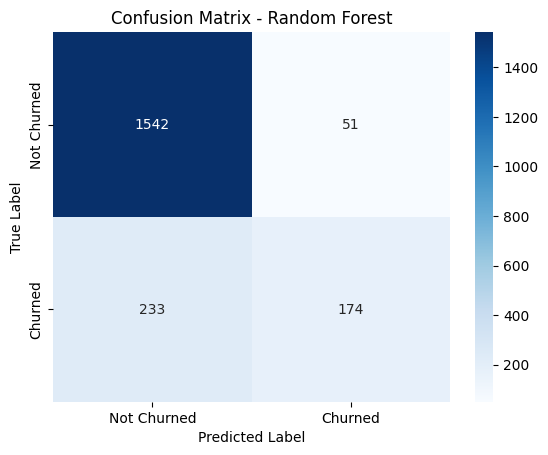

In [ ]:
y_pred = rfc.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churned', 'Churned'], yticklabels=['Not Churned', 'Churned'])
plt.title("Confusion Matrix - Random Forest")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [ ]:
joblib.dump(rfc, 'customer_churn_rfc.pkl')
joblib.dump(scaler, 'scaler.pkl')
print("Random Forest model and scaler saved.")

def predict_churn(customer_features):
    loaded_model = joblib.load('customer_churn_rfc.pkl')
    loaded_scaler = joblib.load('scaler.pkl')
    customer_features_scaled = loaded_scaler.transform(np.array(customer_features).reshape(1, -1))
    prediction = loaded_model.predict(customer_features_scaled)[0]
    prediction_label = 'Churn' if prediction == 1 else 'Not Churn'
    return prediction_label

Random Forest model and scaler saved.


In [ ]:
def user_input():
    print("Enter the following details to predict churn:")
    credit_score = int(input("Credit Score (integer): "))
    geography = input("Geography (France/Germany/Spain): ").strip().lower()
    gender = input("Gender (Male/Female): ").strip().lower()
    age = int(input("Age (integer): "))
    tenure = int(input("Tenure (number of years): "))
    balance = float(input("Account Balance: "))
    num_of_products = int(input("Number of Products: "))
    has_cr_card = int(input("Has Credit Card? (0 for No, 1 for Yes): "))
    is_active_member = int(input("Is Active Member? (0 for No, 1 for Yes): "))
    estimated_salary = float(input("Estimated Salary: "))

    geography_mapping = {'france': 0, 'germany': 1, 'spain': 2}
    gender_mapping = {'female': 0, 'male': 1}
    encoded_geography = geography_mapping.get(geography, -1)
    encoded_gender = gender_mapping.get(gender, -1)

    if encoded_geography == -1 or encoded_gender == -1:
        print("Invalid input for Geography or Gender. Please try again.")
        return

    customer_features = [
        credit_score, encoded_geography, encoded_gender, age, tenure,
        balance, num_of_products, has_cr_card, is_active_member, estimated_salary
    ]

    prediction = predict_churn(customer_features)
    print(f"Prediction: {prediction}")

user_input()

Enter the following details to predict churn:
Credit Score (integer): 620
Geography (France/Germany/Spain): France
Gender (Male/Female): Female
Age (integer): 35
Tenure (number of years): 2
Account Balance: 50000
Number of Products: 2
Has Credit Card? (0 for No, 1 for Yes): 1
Is Active Member? (0 for No, 1 for Yes): 1
Estimated Salary: 80000
Prediction: Not Churn


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
